In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch

df = pd.read_csv('/content/HomeDataset_after_preprocess_04_06.csv')


In [19]:
df.shape

(951, 25)

In [20]:
df.head()

,num_floor,unit_per_floor,price,age,statuse,view,doc_status,north,sought,west,...,kitch,service,floor_covering,open,parking,warehouse,balcony,equipment,address_encoded,room_to_area
0,4.0,1,1.183908e+08,27.0,8,22.0,10.0,0.0,1.0,0.0,...,50.0,15.0,15.0,1.0,1.0,1.0,1.0,6,1.212189e+08,0.022989
1,5.0,2,1.400000e+08,0.0,8,22.0,10.0,1.0,0.0,0.0,...,50.0,15.0,10.0,1.0,1.0,1.0,1.0,20,1.060243e+08,0.023810
2,5.0,1,1.363636e+08,0.0,8,22.0,10.0,0.0,1.0,0.0,...,50.0,15.0,10.0,1.0,1.0,1.0,1.0,21,1.168818e+08,0.030303
3,4.0,1,5.250000e+07,18.0,8,22.0,3.0,0.0,1.0,0.0,...,50.0,5.0,10.0,1.0,0.0,0.0,1.0,3,9.027674e+07,0.037500
4,4.0,4,1.400000e+08,3.0,8,22.0,10.0,1.0,0.0,0.0,...,50.0,15.0,10.0,1.0,1.0,0.0,1.0,18,1.381376e+08,0.015385


In [21]:
print(f"ابعاد داده اصلی: {df.shape}")
print(f"تعداد سطرهای دارای مقادیر NaN قبل از حذف: {df.isnull().any(axis=1).sum()}")

# بررسی ستون‌های دارای NaN
nan_columns = df.columns[df.isnull().any()].tolist()
print(f"ستون‌های دارای مقادیر NaN: {nan_columns}")

if nan_columns:
    for col in nan_columns:
        nan_count = df[col].isnull().sum()
        print(f"ستون '{col}': {nan_count} مقدار NaN")

# حذف سطرهایی که دارای حداقل یک مقدار NaN هستند
df_clean = df.dropna()

print(f"ابعاد داده پس از حذف NaN: {df_clean.shape}")
print(f"تعداد سطرهای حذف شده: {len(df) - len(df_clean)}")
print(f"درصد داده باقی‌مانده: {(len(df_clean) / len(df)) * 100:.2f}%")

# بررسی مجدد برای اطمینان از حذف تمام NaN ها
print(f"تعداد سطرهای دارای NaN بعد از حذف: {df_clean.isnull().any(axis=1).sum()}")

ابعاد داده اصلی: (951, 25)
تعداد سطرهای دارای مقادیر NaN قبل از حذف: 17
ستون‌های دارای مقادیر NaN: ['view', 'doc_status', 'tel', 'kitch', 'floor_covering']
ستون 'view': 2 مقدار NaN
ستون 'doc_status': 2 مقدار NaN
ستون 'tel': 12 مقدار NaN
ستون 'kitch': 1 مقدار NaN
ستون 'floor_covering': 2 مقدار NaN
ابعاد داده پس از حذف NaN: (934, 25)
تعداد سطرهای حذف شده: 17
درصد داده باقی‌مانده: 98.21%
تعداد سطرهای دارای NaN بعد از حذف: 0


In [22]:
x = df_clean.drop(['price'], axis= 1)
y = df_clean['price']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 42)

import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scale the data
x_scaler = StandardScaler()
x_scaler.fit(x_train)
x_train = x_scaler.transform(x_train)
x_test = x_scaler.transform(x_test)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = y_scaler.transform(y_test.values.reshape(-1,1))

#convert to pytorch tensors
x_train_tensor = torch.tensor(x_train, dtype = torch.float32, device = device)
y_train_tensor = torch.tensor(y_train, dtype = torch.float32, device = device)

x_test_tensor = torch.tensor(x_test, dtype = torch.float32, device = device)
y_test_tensor = torch.tensor(y_test, dtype = torch.float32, device = device)

In [91]:
from torch import nn

class ManualRegresion(nn.Module):
  def __init__(self, input_dim):
    super().__init__()
    self.fc1 = nn.Linear(input_dim,10)
    self.fc2 = nn.Linear(10,1)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(p=0.3)

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.dropout(x)
    x = self.fc2(x)
    return x

Epoch 1: train loss = 1.0580590963363647, val loss = 1.126711130142212
Epoch 500: train loss = 0.692429780960083, val loss = 0.6540051102638245
Epoch 1000: train loss = 0.48843076825141907, val loss = 0.44906216859817505
Epoch 1500: train loss = 0.3967339098453522, val loss = 0.3549853563308716
Epoch 2000: train loss = 0.3551519811153412, val loss = 0.29302114248275757
Epoch 2500: train loss = 0.3265824615955353, val loss = 0.2556810975074768
Epoch 3000: train loss = 0.3053625822067261, val loss = 0.23656417429447174
Epoch 3500: train loss = 0.2898831367492676, val loss = 0.22763171792030334
Epoch 4000: train loss = 0.24995674192905426, val loss = 0.2226477414369583
Epoch 4500: train loss = 0.25931069254875183, val loss = 0.21878859400749207
Epoch 5000: train loss = 0.25289174914360046, val loss = 0.21750260889530182
Epoch 5500: train loss = 0.23035123944282532, val loss = 0.21694427728652954
Epoch 6000: train loss = 0.25959768891334534, val loss = 0.21631474792957306
Epoch 6500: train

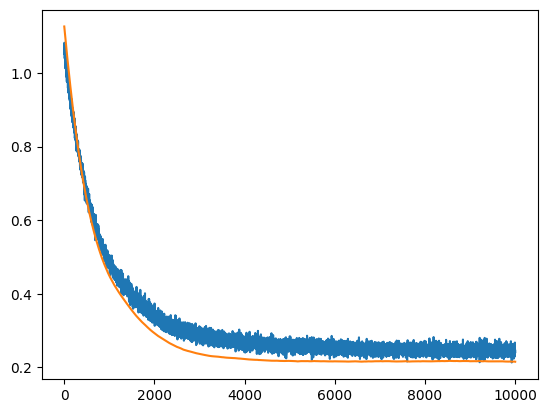

In [93]:
from torch import optim
import matplotlib.pyplot as plt

# Set hyperparameters
torch.manual_seed(42)
lr = 0.0001
input_dim = x_train_tensor.shape[1]
normal_model = ManualRegresion(input_dim).to(device)
optimizer = optim.Adam(normal_model.parameters(), lr = lr, weight_decay=1e-4)
loss_fn = nn.MSELoss()
n_epochs = 10000
train_losses = []
val_losses = []

# Training loop
for epoch in range(n_epochs):
  normal_model.train()
  optimizer.zero_grad()
  y_pred = normal_model(x_train_tensor)
  loss = loss_fn(y_train_tensor, y_pred)
  loss.backward()
  optimizer.step()
  train_losses.append(loss.detach().cpu().item())

  normal_model.eval()
  with torch.no_grad():
    y_pred = normal_model(x_test_tensor)
    test_loss = loss_fn(y_test_tensor, y_pred)
    val_losses.append(test_loss.cpu().item())


  if (epoch + 1) % 500 == 0 or epoch == 0:
    print(f'Epoch {epoch + 1}: train loss = {loss.detach().cpu().item()}, val loss = {test_loss.cpu().item()}')

plt.plot(range(n_epochs), train_losses)
plt.plot(range(n_epochs), val_losses)
plt.show()

In [94]:
from torchsummary import summary

summary(normal_model, input_size=(1, input_dim))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 10]             250
              ReLU-2                [-1, 1, 10]               0
           Dropout-3                [-1, 1, 10]               0
            Linear-4                 [-1, 1, 1]              11
Total params: 261
Trainable params: 261
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [95]:
from sklearn.metrics import (mean_absolute_error,
                             mean_absolute_percentage_error,
                             mean_squared_error,
                             r2_score)
#predict the target
normal_model.eval()
with torch.no_grad():
  y_pred = normal_model(x_test_tensor)

#invers transform
y_pred = y_scaler.inverse_transform(y_pred.detach().cpu())
y_test_inversed = y_scaler.inverse_transform(y_test)

#metrics
scores = {
    'MSE': mean_squared_error(y_pred, y_test_inversed),
    'MAE': mean_absolute_error(y_pred, y_test_inversed),
    'MAPE': mean_absolute_percentage_error(y_pred, y_test_inversed),
    'r_squired': r2_score(y_pred, y_test_inversed),
}

In [96]:
scores

{'MSE': 184441718686820.25,
 'MAE': 10561547.02759894,
 'MAPE': 0.12494472691847876,
 'r_squired': 0.7187201150571796}

In [97]:
torch.save(normal_model, "/content/normal_model_full.pth")